# Assignment 2 - Classification of Iris Categories

Onur Tokoglu

In [136]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_iris = pd.read_csv(u'iris.txt',sep=' ')

df_iris

,sl,sw,pl,pw,c
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [137]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def classify(category):
    sl = np.matrix(df_iris.sl[0:]).T
    sw = np.matrix(df_iris.sw[0:]).T
    pl = np.matrix(df_iris.pl[0:]).T
    pw = np.matrix(df_iris.pw[0:]).T
    y = np.matrix(df_iris.c[0:]).T
        
    for i in range(len(y)):
        if y[i,0] == category:
            y[i,0] = 1
        else:
            y[i,0] = 0
        
    X = np.hstack((sl,sw,pl,pw))
    w = np.matrix([1,1,1,1]).T
    eta = 0.001
    
    for i in range(10000):
        pr = sigmoid(X*w)
        w = w + eta*X.T*(y-pr)

    return (w,pr,y)

def Error(y,pr,tresh):
    fn = 0
    fp = 0
    for i in range(len(y)):
        if (y[i,0] == 1.0 and pr[i,0] < tresh) :
            fn += 1
        elif (y[i,0] == 0.0 and pr[i,0] > tresh) :
            fp += 1

    return (fn/len(y),fp/len(y))

def ErrorVTresh(y,pr):
    tresh = np.matrix(np.linspace(0.2,1,50)).T
    fn = np.zeros((len(tresh),1))
    fp = np.zeros((len(tresh),1))
    for i in range(len(tresh)):
        fn[i,0],fp[i,0] = Error(y,pr,tresh[i,0])
    
    return (tresh,fn,fp)
    


# Category 1

w=[[ 0.71883956]
 [ 3.36466218]
 [-4.74062616]
 [-1.61263832]]


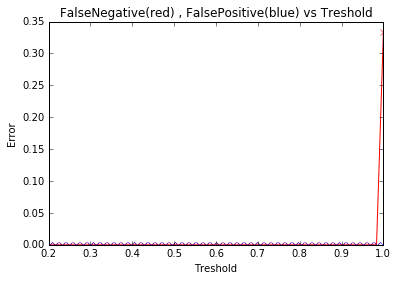

In [138]:
w,pr,y = classify(1)
tresh,fn,fp = ErrorVTresh(y,pr)
plt.plot(tresh,fn,"rx-")
plt.plot(tresh,fp,"bx-")
plt.xlabel('Treshold')
plt.ylabel('Error')
plt.title('FalseNegative(red) , FalsePositive(blue) vs Treshold')
print('w='+str(w))


# Category 2

w=[[ 0.73300616]
 [-1.87866542]
 [ 1.04693053]
 [-2.84352623]]


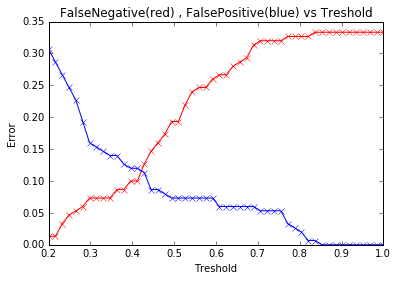

In [139]:
w,pr,y = classify(2)
tresh,fn,fp = ErrorVTresh(y,pr)
plt.plot(tresh,fn,"rx-")
plt.plot(tresh,fp,"bx-")
plt.xlabel('Treshold')
plt.ylabel('Error')
plt.title('FalseNegative(red) , FalsePositive(blue) vs Treshold')
print('w='+str(w))

# Category 3

w=[[-4.80685745]
 [-4.96911165]
 [ 6.35877022]
 [ 7.88567013]]


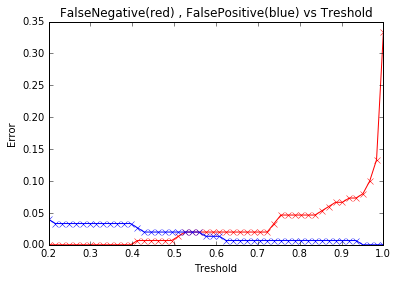

In [140]:
w,pr,y = classify(3)
tresh,fn,fp = ErrorVTresh(y,pr)
plt.plot(tresh,fn,"rx-")
plt.plot(tresh,fp,"bx-")
plt.xlabel('Treshold')
plt.ylabel('Error')
plt.title('FalseNegative(red) , FalsePositive(blue) vs Treshold')
print('w='+str(w))